- you can test each algorithm on each dataset by excuting the corresponding section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import measures_calculator,matchY
from torchvision import datasets

import api
imp.reload(api)
import time

def set_seed(seed=1):
    import random
    random.seed(seed)
    np.random.seed(seed)

In [2]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        
        if name=='face':
            from sklearn.datasets import fetch_olivetti_faces
            X, Y_true = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=0)
            return X, Y_true
        
        if name== 'pulsar':
            df=pd.read_csv('./real_data/Pulsar.csv', header=None)
            X=df.iloc[:,:-1].values.astype(np.float)
            Y_true=df.iloc[:,-1].values.astype(np.float)
            return X,Y_true
        
        if name== 'sloan':
            df=pd.read_csv('./real_data/Sloan.csv', header=None)
            X=df.iloc[:,:-1].values.astype(np.float)
            Y_true = df.iloc[:,-1].values
            Y_true[Y_true == 'STAR'] = 0.
            Y_true[Y_true == 'GALAXY'] = 1.
            Y_true[Y_true == 'QSO'] = 2.
            return X,Y_true
        
        if name== 'bio':
            df=pd.read_csv('./real_data/bio.csv', header=None)
            X=df.iloc[:,:-1].values.astype(np.float)
            Y_true=df.iloc[:,-1].values.astype(np.float)
            return X,Y_true
        
        if name== 'phy':
            df=pd.read_csv('./real_data/phy.csv', header=None,sep='\t')
            missing=[19,20,21,43,44,45,28,54]
            df.iloc[:,missing]=df.iloc[:,missing].fillna(df.iloc[:,missing].mean())
            X=df.iloc[:,:-1].values.astype(np.float)
            Y_true=df.iloc[:,-1].values.astype(np.float)
            return X,Y_true
        
        if name== 'rna':
            df=pd.read_csv('./real_data/codrna.csv', header=None)
            df=df.fillna(0)
            X=df.iloc[:,:-1].values.astype(np.float)
            Y_true=df.iloc[:,-1].values.astype(np.float)
            Y_true[Y_true == -1] = 0.
            return X,Y_true
    
        if name=='mnist_784':
            dataset2 = datasets.MNIST('../data', train=True, download=True)
            N=dataset2.test_data.shape[0]
            X=dataset2.test_data.numpy().reshape(N,784)/255
            Y_true=dataset2.test_labels.numpy()
            return X,Y_true
        
        if name=='fmnist_784':
            dataset2 = datasets.FashionMNIST('../data', train=True, download=True)
            N=dataset2.test_data.shape[0]
            X=dataset2.test_data.numpy().reshape(N,784)/255
            Y_true=dataset2.test_labels.numpy()
            return X,Y_true

# GDT

## phy

In [14]:
X,Y_true=DataLoader.load('phy')

t1=time.time()
Y_pred= api.DGSFC.fit( X,
                      K_d=20,
                      K_s=15,
                      alpha=0.1,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

72.69545912742615


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.48278,0.005008,0.45186,0.007772,1.0,3.0


## face

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.614231,0.416394,0.6175,0.765858,1.0,38.0


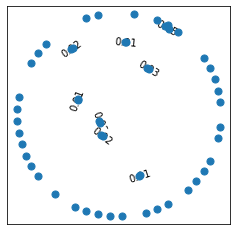

In [94]:
X,Y_true=DataLoader.load('face')

Y_pred = api.DGSFC.fit( X,
                      K_d=10,
                      K_s=3,
                      alpha=0.50,
                      epsilon=0,
                      plot=True,
                      scale=True
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## mnist

In [3]:
X,Y_true=DataLoader.load('mnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=25,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



513.5905771255493


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.559883,0.412404,0.55955,0.535258,1.0,11.0


In [15]:
X,Y_true=DataLoader.load('mnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=20,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



377.25592255592346


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.527846,0.421443,0.550983,0.555372,1.0,11.0


In [19]:
X,Y_true=DataLoader.load('fmnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=15,
                      alpha=0.10,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



463.9547085762024


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.160962,0.152869,0.249033,0.374446,1.0,6.0


In [4]:
X,Y_true=DataLoader.load('fmnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=10,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



508.6083252429962


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.349675,0.244713,0.3836,0.425367,1.0,11.0


In [18]:
X,Y_true=DataLoader.load('fmnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=15,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



426.7949380874634


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.455516,0.258904,0.460967,0.427272,1.0,11.0


In [14]:
X,Y_true=DataLoader.load('fmnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=20,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



430.2431261539459


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.414649,0.301442,0.427733,0.467637,1.0,11.0


In [6]:
X,Y_true=DataLoader.load('fmnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=12,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



509.3201353549957


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.404024,0.300916,0.44165,0.456232,1.0,11.0


In [7]:
X,Y_true=DataLoader.load('fmnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=14,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



513.6202688217163


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.455658,0.295748,0.461,0.461749,1.0,11.0


In [8]:
X,Y_true=DataLoader.load('fmnist_784')

t1=time.time()
Y_pred = api.DGSFC.fit( X,
                      K_d=50,
                      K_s=13,
                      alpha=0.20,
                      epsilon=0,
                      plot=False,
                      scale=True
                     )
t2=time.time()
print(t2-t1)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



511.97872161865234


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.40272,0.300135,0.429833,0.457087,1.0,11.0


# k-means

In [4]:
from sklearn.cluster import KMeans

## phy

In [10]:
X,Y_true=DataLoader.load('phy')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate,classes
0,0.493712,-0.000016,0.4989,1.0,2.0


## face

In [35]:
X,Y_true=DataLoader.load('face')
kmeans = KMeans(n_clusters=40, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.56905,0.427323,0.585,0.768459,1.0,36.0


## mnist

In [12]:
X,Y_true=DataLoader.load('mnist_784')
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.503267,0.360876,0.508517,0.490661,1.0,10.0


## fmnist

In [5]:
X,Y_true=DataLoader.load('fmnist_784')
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.388156,0.34793,0.4332,0.511828,1.0,10.0


# QuickshiftPP

In [15]:
from QuickshiftPP import *

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## phy

In [22]:
X,Y_true=DataLoader.load('phy')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=1000,beta=0.9)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.413733,0.00012,0.43454,0.000347,1.0,3.0


## face

In [98]:
X,Y_true=DataLoader.load('face')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=8,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.595252,0.380508,0.6025,0.788482,1.0,36.0


## mnist

In [ ]:
X,Y_true=DataLoader.load('mnist_784')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=100,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



# Spectacl

In [21]:
from Spectacl import Spectacl

## phy

In [28]:
np.linalg.norm(X[0]-X,axis=1).max()

14267.48553333789

In [31]:
X,Y_true=DataLoader.load('phy')
s = Spectacl(affinity="radius_neighbors", n_clusters=40, epsilon=1e4)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.442755,-0.000013,0.39582,0.00001,1.0,3.0


In [22]:
X,Y_true=DataLoader.load('phy')
s = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=1e4)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.493712,-0.000016,0.4989,0.000008,1.0,2.0


## face

In [102]:
np.linalg.norm(X[0]-X).max()

240.05353

In [121]:
set_seed(2021)
X,Y_true=DataLoader.load('face')
s = Spectacl(affinity="radius_neighbors", n_clusters=40, epsilon=10)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.3424,0.2058,0.37,0.605376,1.0,34.0


In [ ]:
set_seed(2021)
X,Y_true=DataLoader.load('face')
s = Spectacl(affinity="radius_neighbors", n_clusters=40, epsilon=10)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

## mnist

In [6]:
np.linalg.norm(X[0]-X).max()

2479.6223092766545

In [23]:
set_seed(2021)
X,Y_true=DataLoader.load('mnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=100)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.0919,-0.00005,0.104983,0.000295,1.0,10.0


In [24]:
set_seed(2021)
X,Y_true=DataLoader.load('mnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=1000)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.095643,-0.000032,0.105767,0.000334,1.0,10.0


In [25]:
set_seed(2021)
X,Y_true=DataLoader.load('mnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=100)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.08712,-0.000003,0.106683,0.000285,1.0,10.0


In [26]:
set_seed(2021)
X,Y_true=DataLoader.load('mnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=10)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.20988,0.11814,0.21345,0.205892,1.0,10.0


In [28]:
set_seed(2021)
X,Y_true=DataLoader.load('mnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=8)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.399094,0.169543,0.3892,0.326937,1.0,10.0


In [27]:
set_seed(2021)
X,Y_true=DataLoader.load('mnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=5)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.14661,0.033967,0.1859,0.271162,1.0,8.0


In [30]:
set_seed(2021)
X,Y_true=DataLoader.load('fmnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=8)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



,f1,ARI,ACC,NMI,cover_rate,classes
0,0.473351,0.288627,0.483883,0.449897,1.0,10.0


In [ ]:
set_seed(2021)
X,Y_true=DataLoader.load('fmnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=10, epsilon=10)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning:

test_data has been renamed data

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning:

test_labels has been renamed targets



In [ ]:
set_seed(2021)
X,Y_true=DataLoader.load('fmnist_784')
s = Spectacl(affinity="radius_neighbors", n_clusters=100, epsilon=10)
Y_pred = s.fit_predict(X)
# plot_tools.autoPlot(X,Y_pred)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true, Y_pred)
result